# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

## Description du jeu du données:

### Contexte

La maladie à coronavirus (COVID-19) est une maladie infectieuse causée par un coronavirus récemment découvert. La plupart des personnes infectées par le virus COVID-19 souffriront d'une maladie respiratoire légère à modérée et se rétabliront sans nécessiter de traitement particulier. Les personnes âgées et celles qui présentent des problèmes médicaux sous-jacents tels que les maladies cardiovasculaires, le diabète, les maladies respiratoires chroniques et le cancer sont plus susceptibles de développer une maladie grave.

Pendant toute la durée de la pandémie, l'un des principaux problèmes auxquels les prestataires de soins de santé ont été confrontés est le manque de ressources médicales et d'un plan approprié pour les distribuer efficacement. En ces temps difficiles, être capable de prédire le type de ressources dont un individu pourrait avoir besoin au moment où il est testé positif ou même avant cela sera d'une aide immense pour les autorités car elles seront en mesure de se procurer et d'organiser les ressources nécessaires pour sauver la vie de ce patient.

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

### Description du jeux de données

Le jeu de données a été fourni par le gouvernement mexicain. Cet ensemble de données contient un nombre énorme d'informations anonymes relatives aux patients, y compris les conditions préalables. L'ensemble de données brutes se compose de 21 caractéristiques uniques et de 1 048 576 patients uniques. Dans les caractéristiques booléennes, 1 signifie "oui" et 2 signifie "non". Les valeurs 97 et 99 indique des données manquantes.

Quelques informations sur les *features*:

- sex : femme ou homme
- age : du patient.
- classification : résultats du test covid. Les valeurs 1-3 signifient que le patient a été diagnostiqué avec un covid à différents degrés. 4 ou plus signifie que le patient n'est pas porteur du covid ou que le test n'est pas concluant.
- patient type: hospitalisé ou non hospitalisé.
- pneumonia : si le patient a déjà une inflammation lié à la pneumonie ou non.
- pregnancy : si la patiente est enceinte ou non.
- diabetes : indique si le patient est diabétique ou non.
- copd: indique si le patient est atteint ou non de bronchopneumopathie chronique obstructive.
- asthma : indique si le patient est asthmatique ou non.
- inmsupr : indique si le patient est immunodéprimé ou non.
- hypertension : si le patient est hypertendu ou non.
- cardiovascular : si le patient est atteint d'une maladie du cœur ou des vaisseaux sanguins.
- renal chronic : si le patient est atteint d'une maladie rénale chronique ou non.
- other disease : si le patient est atteint d'une autre maladie ou non.
- obesity : si le patient est obèse ou non.
- tobacco : si le patient est un fumeur.
- usmr : indique si le patient a traité des unités médicales de premier, deuxième ou troisième niveau.
- medical unit: type d'institution du système national de santé qui a dispensé les soins.
- intubed : indique si le patient a été relié au ventilateur.
- icu : indique si le patient a été admis dans une unité de soins intensifs.


## Étape 1 : Préparation et nettoyage des données
1. Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.
3. Traitez les données manquantes, incorrectes et invalides
4. Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

# 1 Chargez le jeu de données dans un dataframe à l'aide de Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# chargement des donneés dans un pandas dataframe
data = pd.read_csv('data/covid19_data.csv')

# 2.Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc

In [2]:
# Nombre de lignes et de colonnes
data.shape

(1048575, 21)

In [3]:
# Voir le nom de toutes colonnes et quelques lignes
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# 3.Traitez les données manquantes, incorrectes et invalides

In [4]:
# Données manquantes
# (1) verifie si le jeux de données contient de valeurs N/A
données_manquantes = data.columns[data.isna().all()]
données_manquantes

Index([], dtype='object')

In [5]:
# (2) Traiter les valeurs manquantes 97 et 99.
# Compter le nombre de 97 et 99 dans chaque column
counts = data.apply(lambda col: col.value_counts().get(97, 0), axis=0)
counts_99 = data.apply(lambda col: col.value_counts().get(99, 0), axis=0)

result = pd.DataFrame({'97_count': counts, '99_count': counts_99})
result

C:\Users\USER\AppData\Local\Temp\ipykernel_22908\1128493345.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = data.apply(lambda col: col.value_counts().get(97, 0), axis=0)
C:\Users\USER\AppData\Local\Temp\ipykernel_22908\1128493345.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts_99 = data.apply(lambda col: col.value_counts().get(99, 0), axis=0)


,97_count,99_count
USMER,0,0
MEDICAL_UNIT,0,0
SEX,0,0
PATIENT_TYPE,0,0
DATE_DIED,288,261
INTUBED,848544,7325
PNEUMONIA,0,16003
AGE,135,86
PREGNANT,523511,0
DIABETES,0,0


In [6]:
# Verifier le sexe (si 1 est homme ou non?)
temp_data = data[['SEX','PREGNANT']][data['PREGNANT'] == 1]
temp_data['SEX'].unique()

array([1], dtype=int64)

In [7]:
# Remplacer 99 et 97 par 2 quand le sex est 2
data.loc[data['SEX'] == 2, 'PREGNANT'] = 2
data['PREGNANT'].value_counts()

PREGNANT
2     1036690
1        8131
98       3754
Name: count, dtype: int64

In [8]:
data[data['PNEUMONIA'] == 99]
data.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,2,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,2,1,...,2,2,1,2,2,2,2,2,3,97


In [9]:
# On ne sait pas ce que les valeurs 98 dans la colonne PREGNANT signifie, donc nous décidons de les supprimer.
data = data.drop(data[data['PREGNANT'] == 98].index)

# Pour INTUBED, ICU la plupart des valeurs sont nulles, nous allons donc supprimer la colonne.
data.drop(['INTUBED','ICU'], axis=1, inplace=True)

# PNEUMONIA, DATE_DIED, AGE nous allons supprimer les lignes avec les valeures manquantes
data = data.drop(data[(data['AGE'] == 97) | (data['AGE'] == 99)].index)
data = data.drop(data[data['PNEUMONIA'] == 99].index)

In [10]:
# Nous considérons  que la date '9999-99-99' représente des valeurs de dates pour lesquelles les patients ne sont pas morts, et nous remplacerons ces valeurs par 'not_dead'
data['DATE_DIED'] = data['DATE_DIED'].replace('9999-99-99', 'not_dead')

In [11]:
#Nous vérifions à nouveau s'il y a encore des valeurs manquantes
counts = data.apply(lambda col: col.value_counts().get(97, 0), axis=0)
counts_99 = data.apply(lambda col: col.value_counts().get(99, 0), axis=0)
result = pd.DataFrame({'97_count': counts, '99_count': counts_99})
result

C:\Users\USER\AppData\Local\Temp\ipykernel_22908\3598637874.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = data.apply(lambda col: col.value_counts().get(97, 0), axis=0)
C:\Users\USER\AppData\Local\Temp\ipykernel_22908\3598637874.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts_99 = data.apply(lambda col: col.value_counts().get(99, 0), axis=0)


,97_count,99_count
USMER,0,0
MEDICAL_UNIT,0,0
SEX,0,0
PATIENT_TYPE,0,0
DATE_DIED,288,261
PNEUMONIA,0,0
AGE,0,0
PREGNANT,0,0
DIABETES,0,0
COPD,0,0


## Etape 2:  Effectuer une analyse exploratoire et une visualisation
1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.
2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.
3. Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)
4. Notez les résultats intéressants de l'analyse exploratoire.


# 1.Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.

In [12]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [13]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06,1.028973e+06
mean,1.641665e+00,8.997163e+00,1.501530e+00,1.188969e+00,1.864228e+00,4.192825e+01,1.992352e+00,2.173304e+00,2.247343e+00,2.229273e+00,2.281486e+00,2.115953e+00,2.416399e+00,2.248239e+00,2.111779e+00,2.244207e+00,2.201022e+00,5.289638e+00
std,4.795115e-01,3.719673e+00,4.999979e-01,3.914842e-01,3.425467e-01,1.675390e+01,8.712010e-02,5.311597e+00,5.004902e+00,4.984017e+00,5.313819e+00,5.121786e+00,6.509198e+00,5.067661e+00,5.058284e+00,5.012596e+00,5.204709e+00,1.889771e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00


# 2.Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.

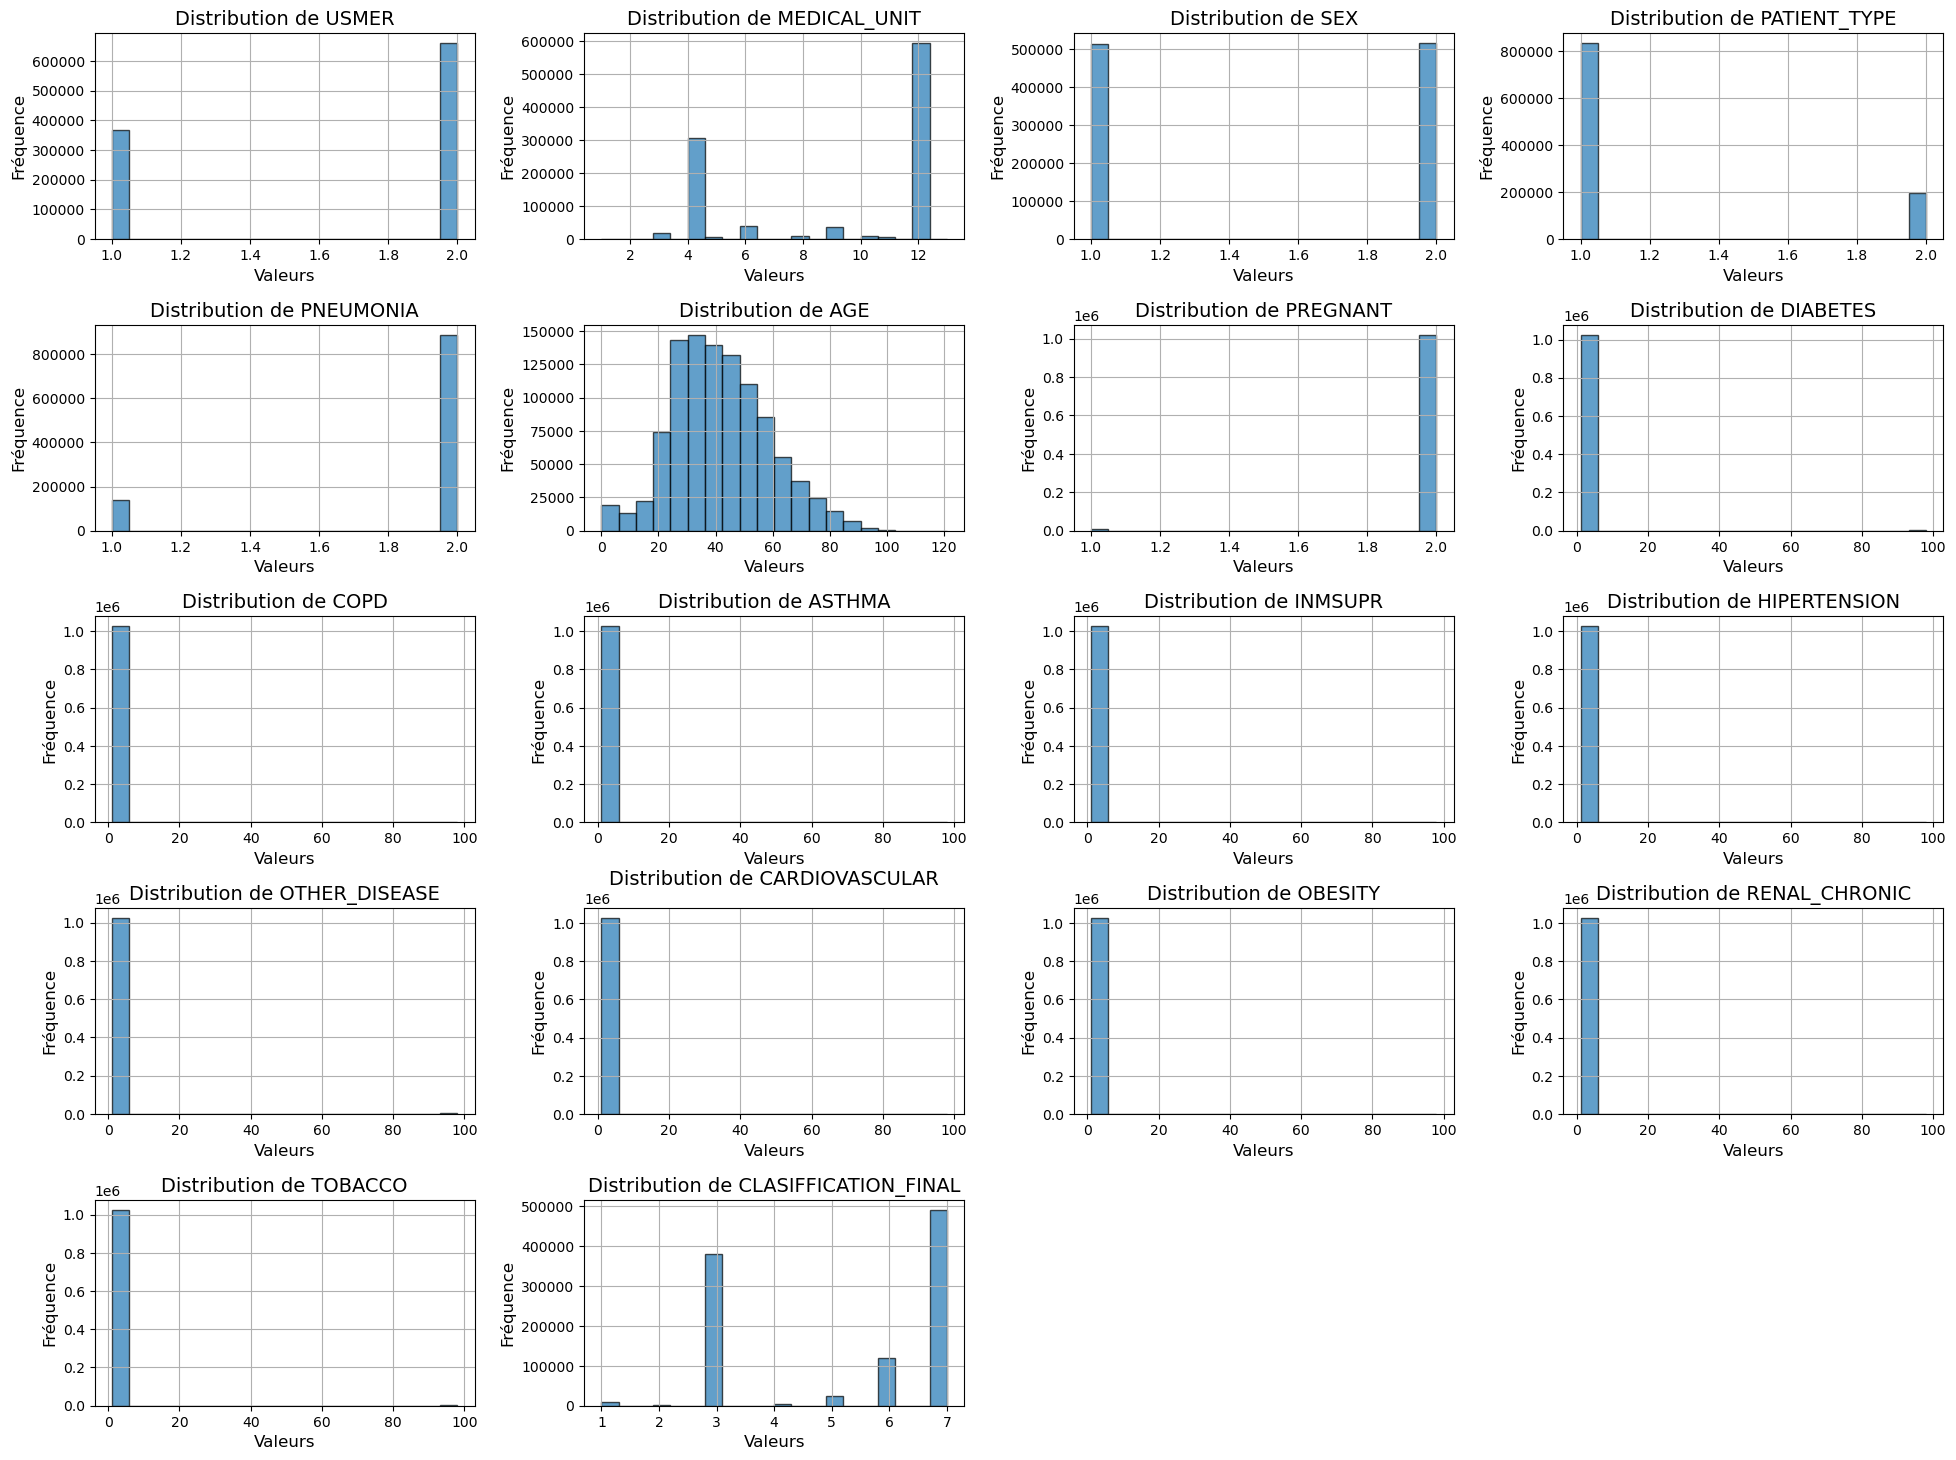

In [14]:
#data.hist()
df = pd.DataFrame(data)

# Création des histogrammes avec des sous-graphiques
axes = df.hist(bins=20, edgecolor='black', alpha=0.7, figsize=(20, 15))
plt.tight_layout(pad=3.0)

# Ajout de titres et labels pour chaque sous-graphe
for ax in axes.flatten():
    ax.set_title(f'Distribution de {ax.get_title()}', fontsize=14)
    ax.set_xlabel('Valeurs', fontsize=12)
    ax.set_ylabel('Fréquence', fontsize=12)

# Affichage des graphiques
plt.show()

# 3.Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les features (voir visualisation avec heatmap)

In [15]:
# Transformer les données en dataframe
df = pd.DataFrame(data)

# Calcul de la matrice des corrélations
temp_data = df.drop('DATE_DIED', axis=1, inplace=True)

In [16]:
# Visualiser les colonnes disponbles
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

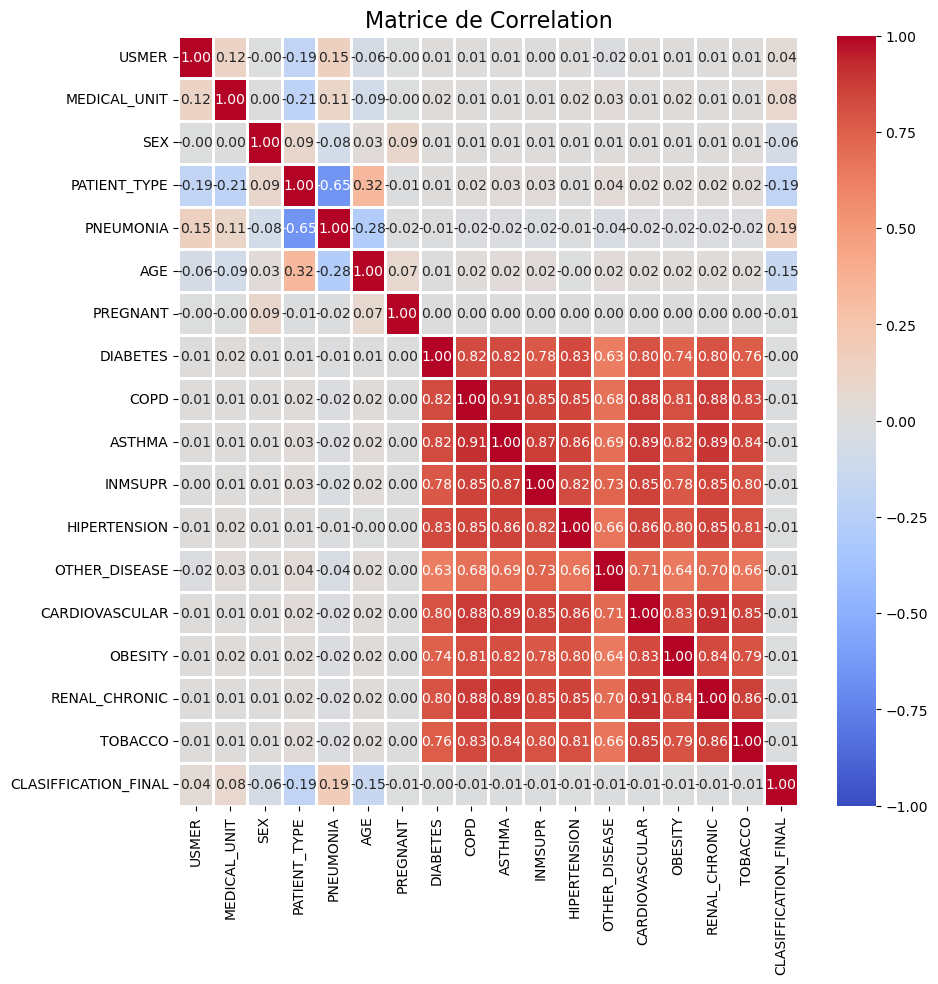

In [17]:
corr_matrix = data[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']].corr()

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10,10))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Matrice de Correlation', fontsize=16)

# Afficher le graphique
plt.show()

# 4.Notez les résultats intéressants de l'analyse exploratoire.

- L'âge moyen des patients atteints de la COVID-19 est de 41 ans, ce qui confirme l'idée que les personnes plus âgées sont davantage susceptibles de tomber malades.
  
- Une forte corrélation a été observée entre les antécédents d'accidents cardiovasculaires et les maladies rénales. De même, il existe une corrélation significative entre l'asthme et les maladies cardiovasculaires. Il pourrait être intéressant d'explorer ces liens dans de futures études, afin de formuler des recommandations plus adaptées aux patients souffrant de ces pathologies.
  
- Les classifications 7,3 et 6 sont les plus fréquentes parmi les patients atteints de la COVID-19.
  
- Nous avons également constaté que les patients âgés de 65 ans ou plus présentent le taux de mortalité le plus élevé.

## Etape 3: Posez des questions sur les données et répondez-y.
1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.
3. Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.
4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

# 1.Posez au moins 4 questions intéressantes sur votre ensemble de données

Questions

1.   Quelle est la tranche d'âge à laquelle les patients meurent le plus
2.   Quelle est la repartition des classifications finales
3.   Quel est le sexe le plus affecté par la maladie(Covid) sur la base des données présentées
4.   Quelle est la distribution d'âge des patients?


# 2.Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.

In [18]:
## Question 1

data['DATE_DIED']
# Tranformation de donnée pour obtenir le nombre de décès par âge
age_dist = data['AGE'][data['DATE_DIED'] != 'not_dead'].value_counts().reset_index()

# Identification de l'âge de décès le plus dominent
age_dist[age_dist['count'] == max(age_dist['count'])]

# values_counts() pour compter le nombre d'élément par élément distinct
# reset_index() pour transformer les resultats en pandas dataframe avec des colonnes

,AGE,count
0,65,2125


In [19]:
#afficher les premières lignes d’un DataFrame ou d’une série
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [20]:
## Question 2
fin_class = data['CLASIFFICATION_FINAL'].value_counts().reset_index()
fin_class

,CLASIFFICATION_FINAL,count
0,7,491336
1,3,380103
2,6,118477
3,5,25537
4,1,8565
5,4,3106
6,2,1849


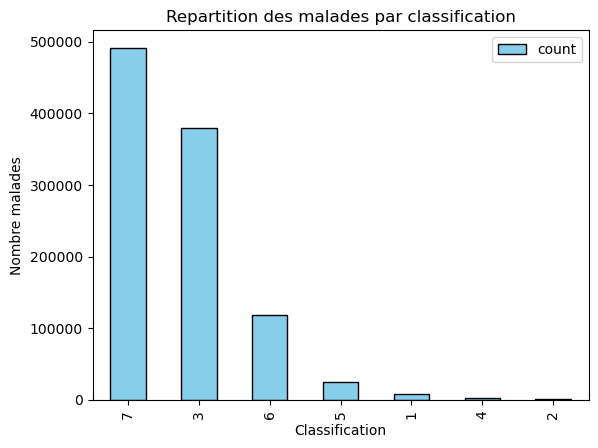

In [21]:
## Question 2
df = fin_class
df.plot(kind='bar', x='CLASIFFICATION_FINAL', y='count', color='skyblue', edgecolor='black')
plt.xlabel('Classification')
plt.ylabel('Nombre malades')
plt.title('Repartition des malades par classification')
plt.show()

# Plot pour créer des graphes

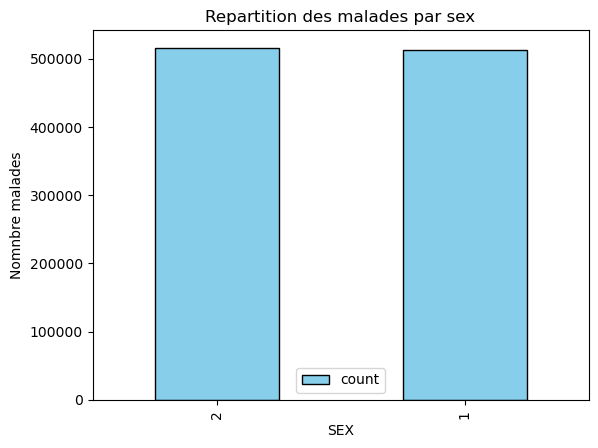

,SEX,count
0,2,516061
1,1,512912


In [22]:
## Question 3
sex_dist = data['SEX'].value_counts().reset_index()
df = sex_dist
df.plot(kind='bar', x='SEX', y='count', color='skyblue', edgecolor='black')
plt.xlabel('SEX')
plt.ylabel('Nomnbre malades')
plt.title('Repartition des malades par sex')
plt.show()

sex_dist

#Compte tenu de l'absence de données complètes sur les patients atteints de la COVID-19, 
#il est difficile de déterminer lequel des sexes est le plus affecté. 
#Les résultats indiquent que les deux sexes sont représentés.

<Axes: >

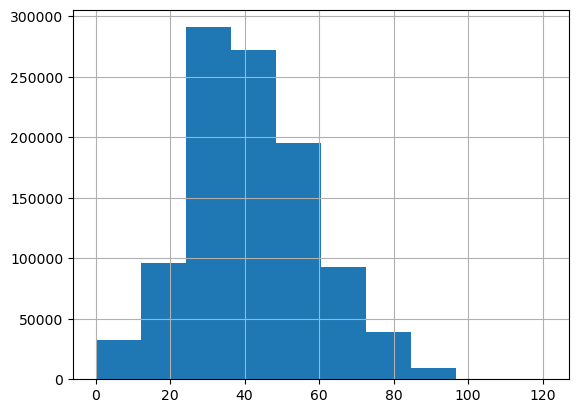

In [23]:
# Question 4
data['AGE'].hist()
# hist pour créer des histogrames

In [24]:
data.head()
#afficher les premières lignes d’un DataFrame ou d’une série

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3


## Étape 4 : résumez vos déductions et rédigez une conclusion.
1. Rédigez un résumé de ce que vous avez appris de l'analyse.
2. Incluez les idées et les graphiques intéressants des sections précédentes.
3. Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

Analyse

Analyse des Données des Patients Atteints de COVID-19
Moyenne d'âge des patients :
L'âge moyen des patients atteints de COVID-19 est de 41 ans, ce qui confirme l'hypothèse selon laquelle les personnes plus âgées sont plus susceptibles de contracter la maladie. Toutefois, bien que l'âge moyen soit relativement modéré, cela souligne l'importance d'observer les groupes d'âge avancé, qui restent particulièrement vulnérables face aux formes graves de la maladie.

Corrélations fortes entre certaines pathologies :
Il existe une forte corrélation entre les antécédents de maladies cardiovasculaires et de maladies rénales. Cela suggère qu'un patient souffrant de l'une de ces pathologies pourrait également être à risque accru de souffrir de l'autre. De plus, une autre corrélation notable se trouve entre les patients ayant des antécédents d'asthme et ceux souffrant de maladies cardiovasculaires. Ces résultats méritent d’être approfondis dans des études futures afin de mieux comprendre les liens entre ces affections et d'élaborer des recommandations cliniques personnalisées pour les patients présentant plusieurs comorbidités.

Les classifications les plus fréquentes chez les patients COVID :
Parmi les patients atteints de COVID-19, les classifications les plus fréquentes sont 7,3 et 6, ce qui pourrait faire référence à un système de classification des symptômes ou de gravité de la maladie. Cette tendance doit être examinée de plus près pour mieux comprendre les variations cliniques et peut-être affiner le système de classification pour des traitements plus ciblés.

Décès chez les patients âgés de 65 ans et plus :
Il a été observé que les patients âgés de 65 ans et plus sont ceux qui décèdent le plus fréquemment en raison du COVID-19. Cela renforce l'importance d'un suivi médical accru et de la mise en place de mesures de prévention pour les personnes âgées, notamment celles présentant des comorbidités comme les maladies cardiaques ou pulmonaires.

Conclusion
Cette analyse met en lumière plusieurs tendances importantes concernant les facteurs de risque et les caractéristiques des patients atteints de COVID-19. Des études futures devraient explorer en profondeur les corrélations entre les maladies chroniques, telles que les pathologies cardiovasculaires et rénales, ainsi que les implications de l'âge dans la mortalité. En approfondissant ces points, il sera possible de développer des stratégies de traitement plus ciblées et des recommandations de prévention adaptées aux groupes de patients les plus vulnérables.

### Étape 5: Faites des prédictions
1. Divisez le jeux de données (80% entrainement: 20% test)
2. Comparer les résultats de classifications de 3 modèles de machine learning (regression linéaire, *random forest*, *Naive Bayes*) suivant les trois critères: *recall*, *accuracy*, *precision*

In [25]:
# transformation de données
# Créer une nouvelle colonne binaire 'high_risk'
data['high_risk'] = data['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

model_data = data.drop(['DATE_DIED', 'CLASIFFICATION_FINAL'], axis=1)

In [26]:
model_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,high_risk
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,0
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,0
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,1


In [27]:
for column in model_data.columns:
    print(f"Unique values in column '{column}':")
    print(model_data[column].value_counts())
    print()  # Pour une meilleure lisibilité

Unique values in column 'USMER':
USMER
2    660256
1    368717
Name: count, dtype: int64

Unique values in column 'MEDICAL_UNIT':
MEDICAL_UNIT
12    593937
4     307268
6      38544
9      37740
3      18758
8      10205
10      7866
5       7056
11      5571
7        890
13       828
2        159
1        151
Name: count, dtype: int64

Unique values in column 'SEX':
SEX
2    516061
1    512912
Name: count, dtype: int64

Unique values in column 'PATIENT_TYPE':
PATIENT_TYPE
1    834529
2    194444
Name: count, dtype: int64

Unique values in column 'PNEUMONIA':
PNEUMONIA
2    889267
1    139706
Name: count, dtype: int64

Unique values in column 'AGE':
AGE
30     26570
31     25534
28     24856
29     24705
34     24535
       ...  
118        2
115        2
111        1
121        1
113        1
Name: count, Length: 119, dtype: int64

Unique values in column 'PREGNANT':
PREGNANT
2    1021103
1       7870
Name: count, dtype: int64

Unique values in column 'DIABETES':
DIABETES
2     902718

In [28]:
model_data = model_data[~model_data.isin([98]).any(axis=1)]

In [29]:
for column in model_data.columns:
    print(f"Unique values in column '{column}':")
    print(model_data[column].value_counts())
    print()# Pour une meilleure lisibilité 

Unique values in column 'USMER':
USMER
2    655933
1    365722
Name: count, dtype: int64

Unique values in column 'MEDICAL_UNIT':
MEDICAL_UNIT
12    589060
4     306865
6      37763
9      37118
3      18642
8      10084
10      7536
5       7044
11      5553
7        870
13       810
2        159
1        151
Name: count, dtype: int64

Unique values in column 'SEX':
SEX
2    511795
1    509860
Name: count, dtype: int64

Unique values in column 'PATIENT_TYPE':
PATIENT_TYPE
1    830233
2    191422
Name: count, dtype: int64

Unique values in column 'PNEUMONIA':
PNEUMONIA
2    884402
1    137253
Name: count, dtype: int64

Unique values in column 'AGE':
AGE
30     26456
31     25419
28     24735
29     24595
34     24406
       ...  
115        2
119        2
111        1
121        1
113        1
Name: count, Length: 118, dtype: int64

Unique values in column 'PREGNANT':
PREGNANT
2    1013814
1       7841
Name: count, dtype: int64

Unique values in column 'DIABETES':
DIABETES
2    899531


In [30]:
model_data.shape

(1021655, 18)

In [31]:
# Ici nous utilisons le one-hot-encoding pour facilité la consommation des donnés par le model et eviter de creer des biais
y = model_data['high_risk']
age = model_data['AGE']
model_data = model_data.drop(columns=['AGE', 'high_risk', 'MEDICAL_UNIT']).astype('category')

In [32]:
data_dummies = pd.get_dummies(model_data).astype(int)
data_dummies.head()

,USMER_1,USMER_2,SEX_1,SEX_2,PATIENT_TYPE_1,PATIENT_TYPE_2,PNEUMONIA_1,PNEUMONIA_2,PREGNANT_1,PREGNANT_2,...,OTHER_DISEASE_1,OTHER_DISEASE_2,CARDIOVASCULAR_1,CARDIOVASCULAR_2,OBESITY_1,OBESITY_2,RENAL_CHRONIC_1,RENAL_CHRONIC_2,TOBACCO_1,TOBACCO_2
0,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
1,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
3,0,1,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
4,0,1,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


In [33]:
data_dummies['AGE'] = age

In [34]:
data_dummies.head()

,USMER_1,USMER_2,SEX_1,SEX_2,PATIENT_TYPE_1,PATIENT_TYPE_2,PNEUMONIA_1,PNEUMONIA_2,PREGNANT_1,PREGNANT_2,...,OTHER_DISEASE_2,CARDIOVASCULAR_1,CARDIOVASCULAR_2,OBESITY_1,OBESITY_2,RENAL_CHRONIC_1,RENAL_CHRONIC_2,TOBACCO_1,TOBACCO_2,AGE
0,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,65
1,0,1,0,1,1,0,1,0,0,1,...,1,0,1,1,0,1,0,0,1,72
2,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,55
3,0,1,1,0,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,53
4,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,68


In [35]:
# Standariser

# Initialiser le mesureur
scaler = StandardScaler()

# Normaliser la colonne
data_dummies['AGE'] = scaler.fit_transform(data_dummies[['AGE']])

data_dummies.head()

,USMER_1,USMER_2,SEX_1,SEX_2,PATIENT_TYPE_1,PATIENT_TYPE_2,PNEUMONIA_1,PNEUMONIA_2,PREGNANT_1,PREGNANT_2,...,OTHER_DISEASE_2,CARDIOVASCULAR_1,CARDIOVASCULAR_2,OBESITY_1,OBESITY_2,RENAL_CHRONIC_1,RENAL_CHRONIC_2,TOBACCO_1,TOBACCO_2,AGE
0,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,1.382691
1,0,1,0,1,1,0,1,0,0,1,...,1,0,1,1,0,1,0,0,1,1.801284
2,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0.784700
3,0,1,1,0,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0.665102
4,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,1.562088


In [36]:
data_dummies.shape

(1021655, 31)

In [37]:
y.shape

(1021655,)

In [38]:
# 1. Diviser le jeu de données (80% entrainement, 20% test)
X = data_dummies
y = y

# Diviser les données en 80% d'entrainement et 20% de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données pour la régression linéaire et Naive Bayes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entraîner les modèles
# 2.1 Régression Linéaire (Logistic Regression)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 2.2 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 2.3 Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# 3. Évaluation des modèles
# Pour chaque modèle, calculons les métriques : Accuracy, Precision, Recall

# Régression Linéaire
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# 4. Comparer les résultats dans un DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_nb],
    'Precision': [precision_lr, precision_rf, precision_nb],
    'Recall': [recall_lr, recall_rf, recall_nb]
})

# Afficher les résultats
print(results)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.659376   0.628574  0.247527
1        Random Forest  0.653127   0.596462  0.262093
2          Naive Bayes  0.634862   0.524752  0.387774


# Sauvegarder le Modèle¶

In [42]:
#import pickle
with open('model_rs.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

['model_j2.joblib']

### Etape 6: Developper et  deployer l'application de Machine learning de detection de cas covid avec Streamlit

# <span style="color:red">DATE LIMITE DE SOUMISSION DU PROJET: /02/2024  à    23H59 GMT </span>     

### <span style="color:red"> Adresse: amanvon.atta@inphb.ci</span>